<a href="https://colab.research.google.com/github/Rahul20037237/Build_your_own_NN/blob/main/eminst_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

crawford_emnist_path = kagglehub.dataset_download('crawford/emnist')
rahula7237_prediction_data_path = kagglehub.dataset_download('rahula7237/prediction-data')

print('Data source import complete.')


In [ ]:
import tensorflow.keras.layers as L
from tensorflow.keras import Sequential
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/emnist


In [ ]:
train = pd.read_csv("/kaggle/input/emnist/emnist-byclass-train.csv",delimiter = ',')
test = pd.read_csv("/kaggle/input/emnist/emnist-byclass-test.csv", delimiter = ',')
mapp = pd.read_csv("/kaggle/input/emnist/emnist-byclass-mapping.txt", delimiter = ' ', index_col=0, header=None)

In [ ]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(697931, 784) (697931,) (116322, 784) (116322,)


In [ ]:
train_x = train_x.values.reshape(-1, 28, 28, 1)
test_x = test_x.values.reshape(-1, 28, 28, 1)
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(697931, 28, 28, 1) (697931,) (116322, 28, 28, 1) (116322,)


In [ ]:
train_x = train_x / 255.0
test_x = test_x / 255.0


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_x.astype("float32"), train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_x.astype("float32"), test_y))

In [ ]:
print(train_dataset.element_spec)
print(test_dataset.element_spec)

(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))
(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))


In [ ]:
def augementation(img,label):
    num_classes=62
    img=tf.image.flip_left_right(img)
    img=tf.image.rot90(img)
    # label = tf.one_hot(label, depth=num_classes)
    return img,label

In [ ]:

train_dataset = (
    train_dataset
    .map(augementation, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(buffer_size=1024)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
test_dataset=(
    test_dataset
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

tf.Tensor(0, shape=(), dtype=int64)


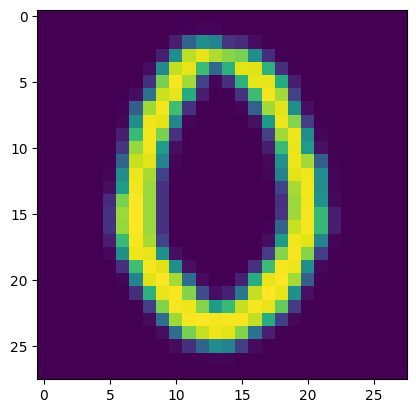

In [ ]:
import matplotlib.pyplot as plt
for i,l in train_dataset.take(1):
    plt.imshow(i[1])
    print(l[1])

tf.Tensor(36, shape=(), dtype=int64)


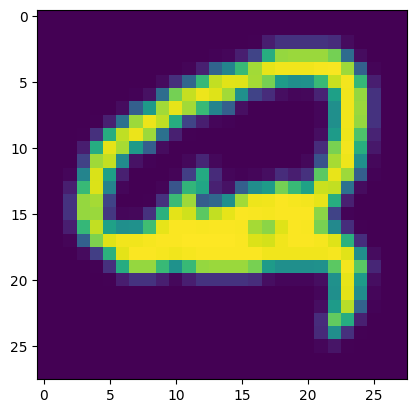

In [ ]:
for i,j in test_dataset.take(1):
    plt.imshow(i[0])
    print(j[0])

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [ ]:
num_classes=62
model = Sequential()

model.add(L.Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',input_shape=(28, 28,1)))
model.add(L.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(L.Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(L.MaxPooling2D(pool_size=(2,2)))

model.add(L.Flatten())
model.add(L.Dense(units=128, activation='relu'))
model.add(L.Dropout(.5))
model.add(L.Dense(units=num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,654 (1.86 MB)

 Trainable params: 486,654 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_dataset,
  validation_data=test_dataset,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


21811/21811 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.7439 - loss: 0.8570 - val_accuracy: 0.1164 - val_loss: 10.5965
Epoch 2/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.8332 - loss: 0.4913 - val_accuracy: 0.1078 - val_loss: 10.8020
Epoch 3/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.8423 - loss: 0.4597 - val_accuracy: 0.1216 - val_loss: 11.6887
Epoch 4/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.8458 - loss: 0.4466 - val_accuracy: 0.1211 - val_loss: 12.3178
Epoch 5/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.8476 - loss: 0.4400 - val_accuracy: 0.1203 - val_loss: 12.6837
Epoch 6/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.8485 - loss: 0.4367 - val_accuracy: 0.1125 - val_loss: 12.5472
Epoch 7/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 69s 3ms/step - accuracy: 0.8497 - loss: 0.4340 - val_accuracy: 0.1132 - val_loss: 12.8190
Epoch 8/10
21811/21811 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - accuracy: 0.84

/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


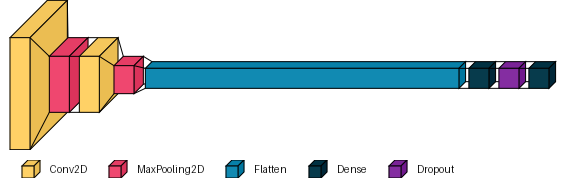

In [ ]:
import visualkeras
from IPython.display import Image, display

# Create the layered view and save it as an image
visualkeras.layered_view(model,legend=True).save("model_visual.png")

# Display the image in the Jupyter notebook
display(Image("model_visual.png"))


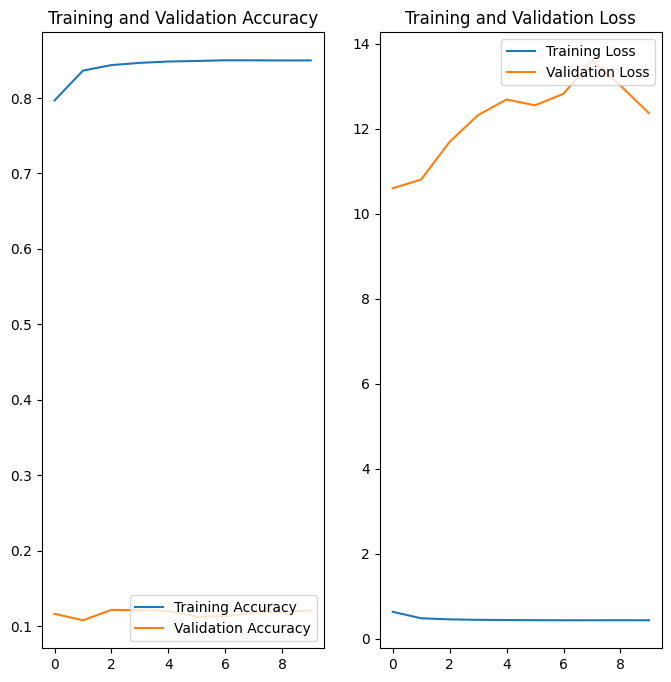

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_path="/kaggle/input/prediction-data/letter-g.png"

img = tf.keras.utils.load_img(
    img_path, target_size=(28, 28)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
grayscale_image = tf.image.rgb_to_grayscale(img_array)

print("Image shape after preprocessing:", grayscale_image.shape)

predictions = model.predict(grayscale_image)
print("Predictions:", predictions)

score = tf.nn.softmax(predictions[0])
predicted_class = tf.argmax(score)
print(
    f"This image most likely belongs to class {predicted_class.numpy()} "
    f"with a confidence of {100 * tf.reduce_max(score).numpy():.2f}%."
)

Image shape after preprocessing: (1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This image most likely belongs to class 42 with a confidence of 4.27%.


In [ ]:
row_42 = chr(mapp.iloc[predicted_class.numpy(),0])
print(str(row_42))


g


In [ ]:
model.save("my_model.h5")